# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [114]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')
print(hospital_read_df.columns)
hospital_read_df.head(5)

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [10]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


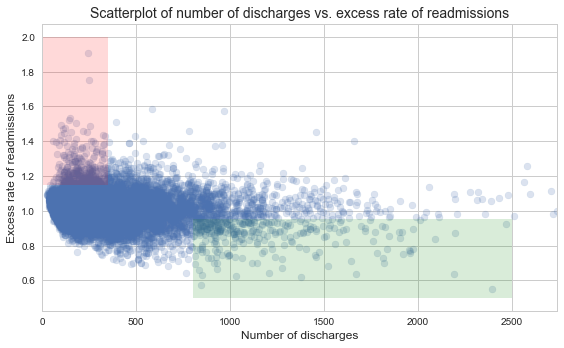

In [122]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]

s = [a for a in clean_hospital_read_df['State'][81:-3]]

y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [128]:
# Your turn
# I want to use joinplot and seaborn works with dataframe,
df_x = pd.DataFrame(x)
df_x.columns = ['x']


df_y = pd.DataFrame(y)
df_y.columns = ['y']

df_s = pd.DataFrame(s)
df_s.columns = ['s']

df_xy = pd.concat([df_x, df_y], axis=1)
df_xy.columns = ['Number of Discharges','Excess Readmission Ratio']
print(df_x.mean())

df_xys = pd.concat([df_x, df_y, df_s], axis=1)

df_xys.columns = ['Number of Discharges','Excess Readmission Ratio', 'State']
df_xys

x    364.313729
dtype: float64


,Number of Discharges,Excess Readmission Ratio,State
0,25,1.0914,MD
1,27,1.0961,MD
2,28,1.0934,MD
3,29,1.0908,CA
4,30,1.1123,PA
5,31,1.0992,TN
6,33,1.0847,IA
7,34,1.0738,WA
8,34,1.0720,NY
9,34,1.0651,CA


C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


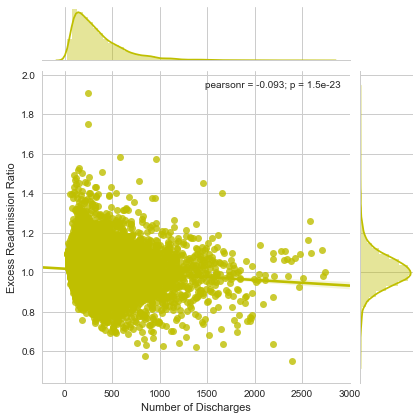

In [77]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df_xy, kind='reg', color = 'y')

In [ ]:
# Q U E S T I O N # A - PART 1


# we want to investigate the following term: 
# Overall, rate of readmissions is trending down with increasing number of discharges

# What I want to use is jointplot. This plot calculate p-value and pearson value. A quick recap. 
# The correlation coefficient can range from -1 to +1.
# Positive means increase in one factor is related to increase of another factor
 
# H(0): There is insignificant relationship between two variables
# H(1): There is significant relationship between two varibales 
# The p-value is a number between zero and one that represents the probability that your data would have arisen 
# if the null hypothesis were true.

# The result shows that p-value less than 5%, so we reject H(0). It means that the variables are related
# correlation coefficient explains this relationship, whereas it is negative, by decreasing number of discharge, 
# excess readmission ratio increases

In [69]:
# Q U E S T I O N # A - PART 2
# in this part we want to assess the following term:
# With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

# What is the specification of the red area
# 'Number of Discharges'         0 - 350 
# 'Excess Readmission Ratio'     1.15 - 2.00

# To asnwer this question I use the approach that I used in the previous part. 

a = df_xy.loc[(df_xy['Number of Discharges'] < 350) & (df_xy['Excess Readmission Ratio'] < 2) & (df_xy['Excess Readmission Ratio'] > 1.15)]
a.head(5)

# Now, it is time to plot it and assess the statesment 
# H(0): There is insignificant relationship between two variables
# H(1): There is significant relationship between two variables

,Number of Discharges,Excess Readmission Ratio
197,56,1.1660
199,57,1.3992
291,62,1.1764
565,76,1.3966
576,76,1.1912


C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


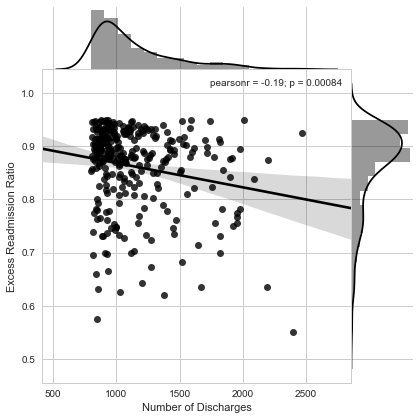

In [78]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=a, kind="reg", space=0, color="k")

In [ ]:
# as you can see the p-value is > 0.01, so we fail to reject H(0), pearson value is negative

In [112]:
# Q U E S T I O N # A - PART 2
# in this part we want to assess the following term:
# With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

# What is the specification of the red area
# 'Number of Discharges'         800 - 2500 
# 'Excess Readmission Ratio'     0.5 - 0.95

# To asnwer this question I use the approach that I used in the previous part. 

b = df_xy.loc[(df_xy['Number of Discharges'] < 2500) & (df_xy['Number of Discharges'] > 800) & 
              (df_xy['Excess Readmission Ratio'] < 0.95) & (df_xy['Excess Readmission Ratio'] > 0.5)]
b.head(5)

# Now, it is time to plot it and assess the statesment 
# H(0): There is insignificant relationship between two variables
# H(1): There is significant relationship between two variables

,Number of Discharges,Excess Readmission Ratio
10598,801,0.8525
10606,805,0.9463
10609,806,0.8814
10614,809,0.9171
10615,810,0.8567


C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


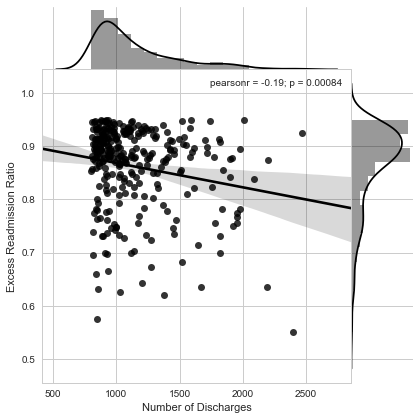

In [76]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=a, kind="reg", space=0, color="k")

In [ ]:
# The p-value is less than 0.01, so we reject H(0), and pearson value os negative. 

In [100]:
# PART B

# (1)
c = df_xy['Excess Readmission Ratio'].loc[(df_xy['Number of Discharges'] < 100)].mean()
print ('THE MEAN IS = ', c)
# In hospitals/facilities with number of discharges < 100, 
# mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

THE MEAN IS =  1.0226183501683506


In [103]:
d = len(df_xy['Excess Readmission Ratio'].loc[(df_xy['Number of Discharges'] < 100) & 
(df_xy['Excess Readmission Ratio'] > 1)])/len(df_xy['Excess Readmission Ratio'].loc[df_xy['Number of Discharges'] < 100])
print('THE RATIO IS = ', d)


THE RATIO IS =  0.6321548821548821


In [104]:
(2)
F = df_xy['Excess Readmission Ratio'].loc[(df_xy['Number of Discharges'] > 1000)].mean()
print ('THE MEAN IS = ', c)

# In hospitals/facilities with number of discharges > 1000, 
# mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

THE MEAN IS =  0.9790730434782613


In [107]:
d = len(df_xy['Excess Readmission Ratio'].loc[(df_xy['Number of Discharges'] > 1000) & 
(df_xy['Excess Readmission Ratio'] > 1)])/len(df_xy['Excess Readmission Ratio'].loc[df_xy['Number of Discharges'] > 1000])
print('THE RATIO IS = ', d)

THE RATIO IS =  0.44565217391304346


In [ ]:
#Conclusions

# There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# YES there is, we looked at the data and we calculated p-value which indicate the thet are related.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and 
# prevent complications that lead to readmissions.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# It could be a reason, as bigger hospital have a higher budget, there are more doctors and teams to provide services to 
# patiens. 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [118]:
# D. Regulatory policy recommendations
# Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation 
# for quality care to continue operation.
# Directives and incentives should be provided for consolidation of hospitals and 
# facilities to have a smaller number of them with higher capacity and number of discharges.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# There is always a trade-off between factors: cost, time, and services. Maybe the objective of small hospital is different
# it is obvious that it is not possbile to have a big hospital in any location. The healthcare network needs connection
# This chain needs big hospital and small hospital to provide servies to everybody. Maybe imposing more cost, will have 
# negative effect on developing healthcare service to a higher number of people as small hospital can not reach to the new
# standard
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


# Another 

clean_hospital_read_df['State'].unique()

array(['KY', 'AZ', 'SD', 'FL', 'AL', 'CA', 'OK', 'TX', 'IL', 'IA', 'IN',
       'LA', 'WY', 'NC', 'NY', 'MI', 'PA', 'NM', 'MS', 'MN', 'NV', 'MD',
       'KS', 'MT', 'SC', 'TN', 'VA', 'GA', 'WA', 'NJ', 'MA', 'CT', 'MO',
       'UT', 'RI', 'OH', 'DC', 'AR', 'WV', 'OR', 'CO', 'ME', 'WI', 'HI',
       'VT', 'AK', 'DE', 'ID', 'NE', 'NH', 'ND'], dtype=object)

In [ ]:
# we can assess how data varies from a state to another, or part of country to another part such as south, north, east, and west
# the follwoing plots shows there is a difference between states, even without checking p-values. We should study what are the 

# underlying reasons for having the gap between these parameters. 

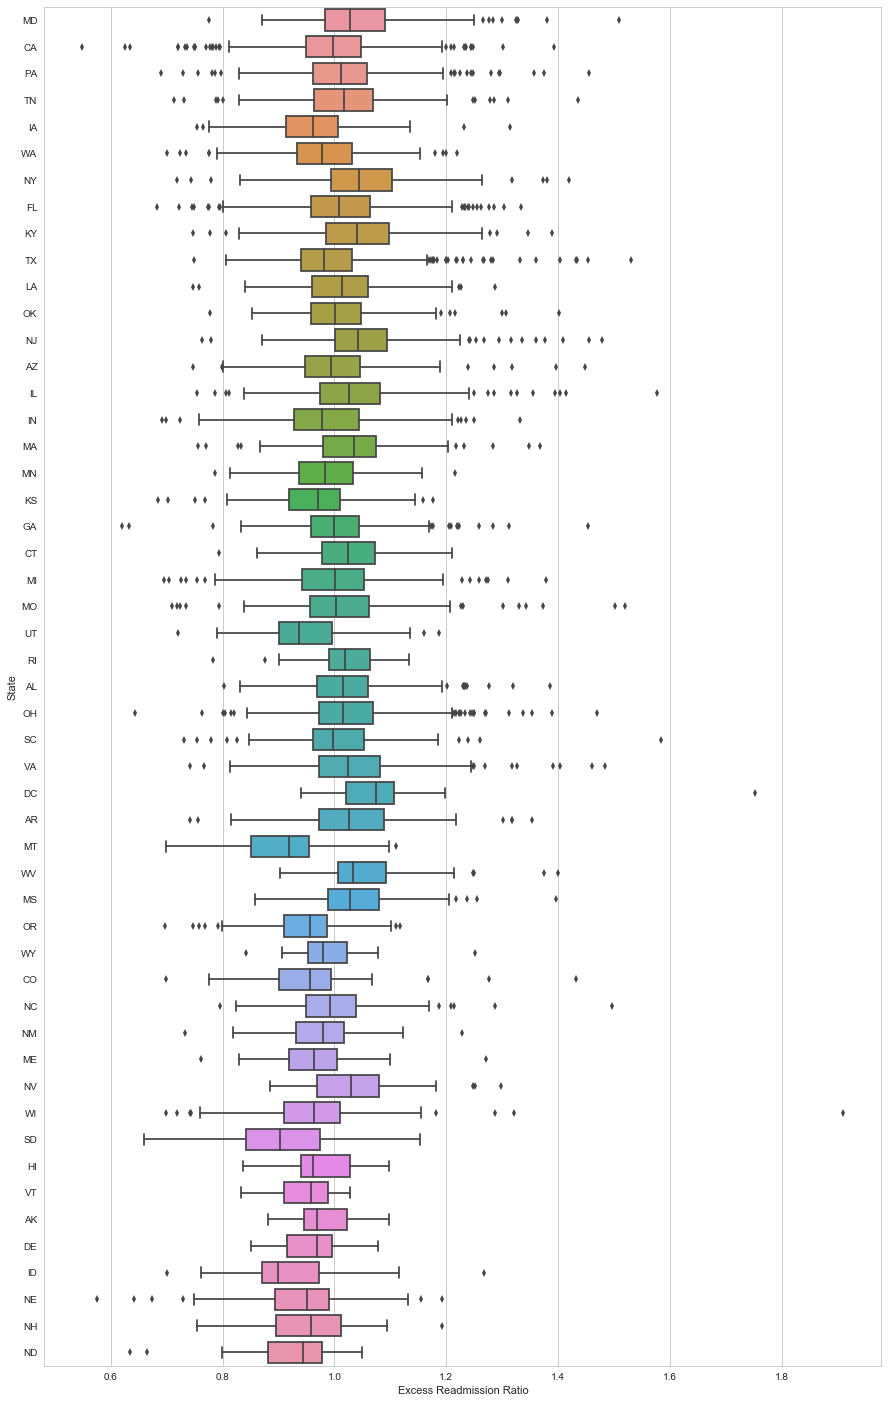

In [157]:
plt.figure(figsize=(15,25))


ax = sns.boxplot(x='Excess Readmission Ratio', y='State', data=df_xys)
ax

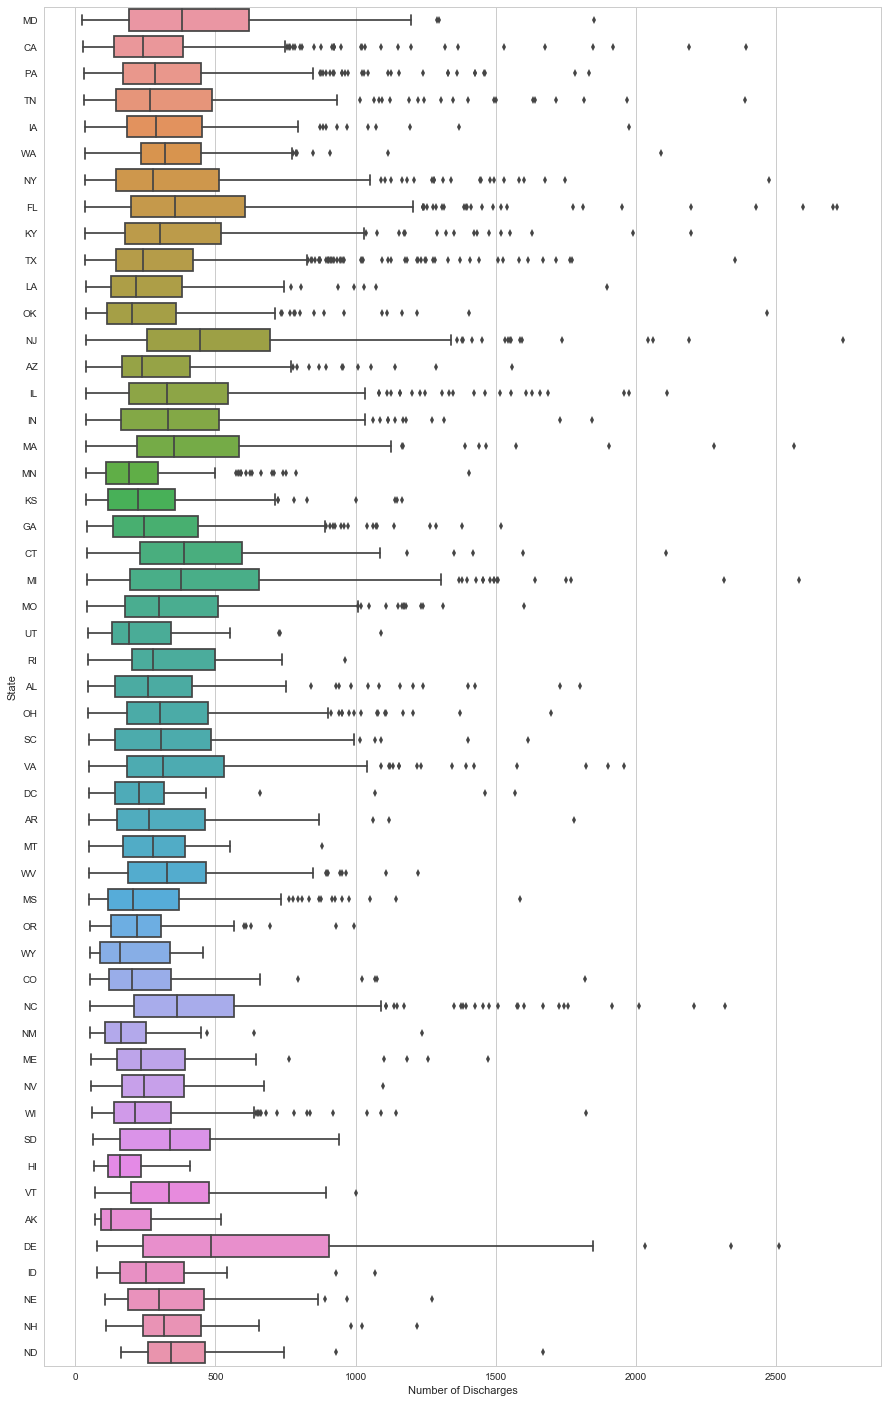

In [154]:
plt.figure(figsize=(15,25))
ax = sns.boxplot(x='Number of Discharges', y='State', data=df_xys)
ax